In [ ]:
import cv2
import cv2 as cv
import urllib
import numpy as np

from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
import matplotlib.image as mpimg
from scipy import ndimage

In [ ]:
def show(image,x=30,y=7):
  plt.figure(figsize=(x,y))
  plt.imshow(image,cmap="gray")

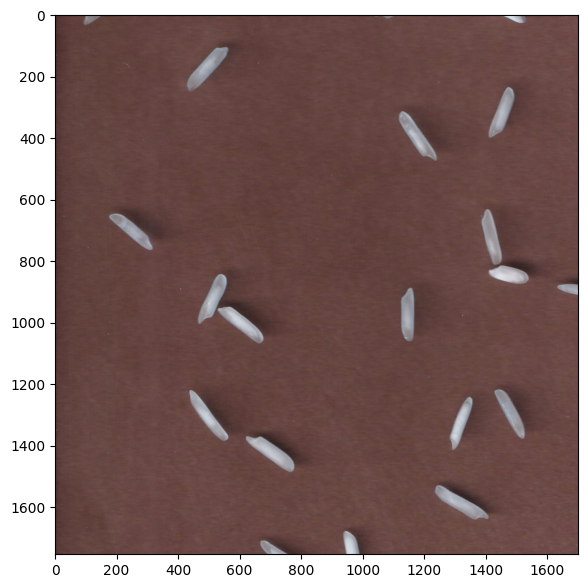

In [ ]:
img = cv2.imread("/content/chalky-78-_png.rf.0ac73c2996ebfc4b246a1230a9dfeab0.jpg")
show(img,20,7)

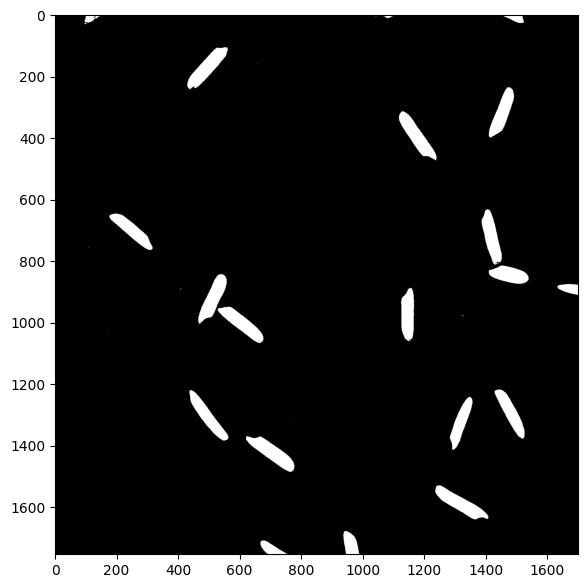

In [ ]:
grayscale_Image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, thresh_img = cv.threshold(grayscale_Image, 120, 255, cv.THRESH_BINARY)

show(thresh_img)

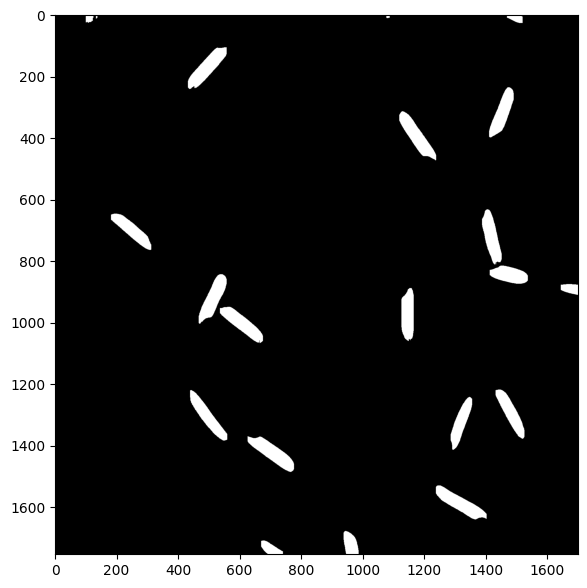

In [ ]:
kernel = np.ones((3),np.uint8)
clear_image = cv.morphologyEx(thresh_img,cv.MORPH_OPEN, kernel, iterations=8)

show(clear_image)

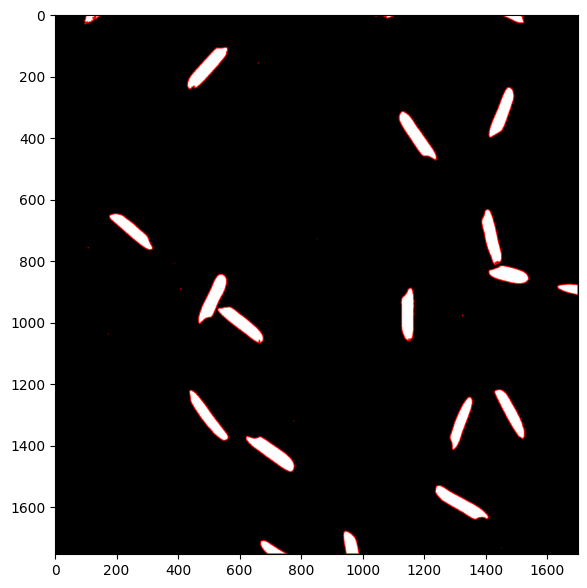

In [ ]:
contours, hierarchy = cv.findContours(thresh_img,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour = cv.cvtColor(thresh_img, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour, contours, -1, (255, 0, 0), 2)
show(output_contour)

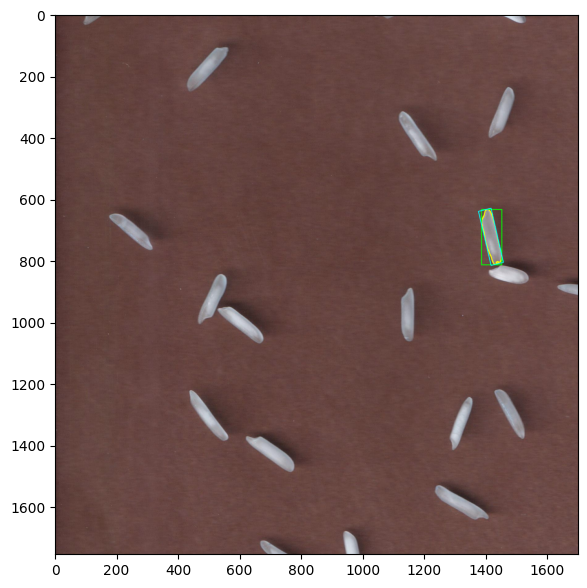

In [ ]:
cnt = contours[27]

# compute straight bounding rectangle
x,y,w,h = cv2.boundingRect(cnt)
img = cv2.drawContours(img,[cnt],0,(255,255,0),2)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# compute rotated rectangle (minimum area)
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)

# draw minimum area rectangle (rotated rectangle)
img = cv2.drawContours(img,[box],0,(0,255,255),2)
show(img)

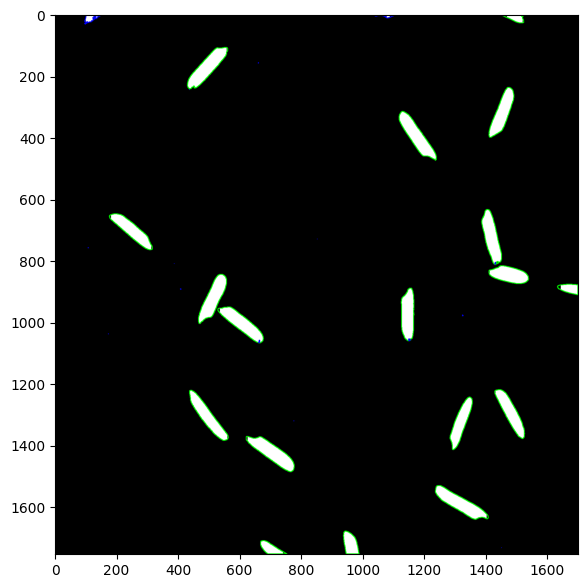

In [ ]:
chalky_threshold = 900

output_contour = cv.cvtColor(clear_image, cv.COLOR_GRAY2BGR)

for contour in contours:
    area = cv.contourArea(contour)

    # Classify chalky and non-chalky based on contour area
    if area < chalky_threshold:
        color = (0, 0, 255)  # Red for chalky
    else:
        color = (0, 255, 0)  # Green for non-chalky

    # Draw the contours with the specified color
    cv.drawContours(output_contour, [contour], -1, color, 2)

# Display the output image
show(output_contour)

In [ ]:
for i, contour in enumerate(contours):
    # Create a mask for the current contour
    mask = np.zeros_like(clear_image)
    cv.drawContours(mask, [contour], 0, 255, thickness=cv.FILLED)

    # Extract the region of interest (ROI) using the mask
    result = cv.bitwise_and(img, img, mask=mask)

    cv.imwrite(f'contour_{i+1}.png', result)

In [ ]:
for i, contour in enumerate(contours):
    # Find the bounding box of the contour
    x, y, w, h = cv.boundingRect(contour)

    # Extract the region of interest (ROI) using the bounding box
    result = img[y:y+h, x:x+w]

    cv.imwrite(f'rice_grain_sep_{i+1}.png', result)

In [ ]:
print(img.shape)

(1753, 1700, 3)


In [ ]:
for i in range(1,35):
  !rm rice_grain_sep_{i}.png

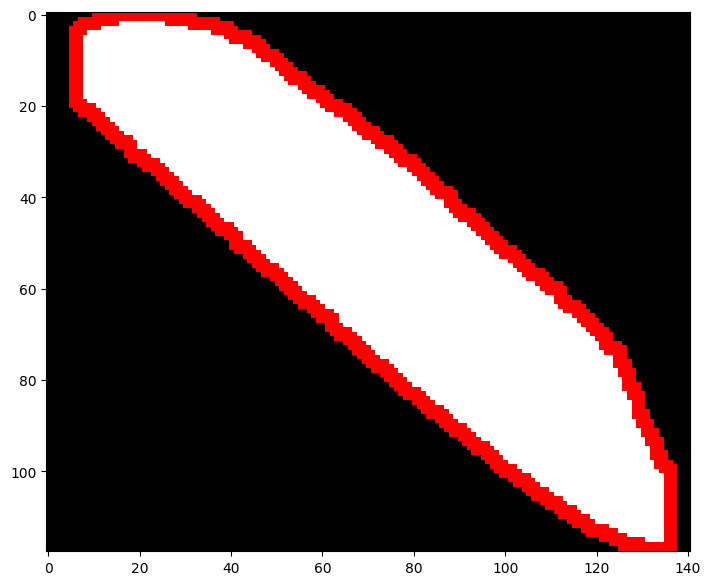

In [ ]:
img2 = cv2.imread("/content/rice_grain_sep_27.png")
grayscale_Image2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
th2, thresh_img2 = cv.threshold(grayscale_Image2, 120, 255, cv.THRESH_BINARY)

clear_image2 = cv.morphologyEx(thresh_img2,cv.MORPH_OPEN, kernel, iterations=8)

contours2, hierarch2 = cv.findContours(clear_image2,
                                          cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour2 = cv.cvtColor(clear_image2, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour2, contours2, -1, (255, 0, 0), 2)
show(output_contour2)